# Traffic Accidents by San Diego Community

This analysis links traffic accident records from SWITRS to San Diego planning communities to see which communityies have the most traffoc accidents. Unfortunately, the data, from the years 2014 and 2015, has very poor lat/lon values -- most records have none -- so the number of records that can be linked into communities is too small for a worthwhile answer 


In [1]:
import seaborn as sns
import metapack as mp
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display 
from shapely.geometry import Point

%matplotlib inline
sns.set_context('notebook')


In [2]:
pkg = mp.jupyter.open_package()
#pkg = mp.jupyter.open_source_package()
pkg

In [3]:
pkg.resource('collisions')

Header,Type,Description
case_id,integer,
accident_year,integer,
proc_date,string,
juris,string,
collision_date,integer,
collision_time,integer,
officer_id,string,
reporting_district,string,
day_of_week,integer,
chp_shift,integer,


In [4]:
col = pkg.resource('collisions').read_csv()


In [5]:
col_sd = col[col.juris.isin( ['3711','3714','3797', '3725'] )]
len(col_sd)

8919

In [6]:

## Create a new GeoPandas frame, converting the targetlongitude and targetlatitude
## colums to a Shapely Point and assigning it to the frame's geometry

t = col_sd.dropna(subset=['longitude', 'latitude'])

gdf = gpd.GeoDataFrame(t, geometry=
                        [Point(x,y) for x,y in zip(-t.longitude, t.latitude) ])

len(gdf),len(col_sd)

(106, 8919)

There are only 106 records with valid lat/lon, out of the original 8919, which is a pretty poort sample. Let's plot those points over a map of the county to see where they are. 

In [7]:
len(col)

838430

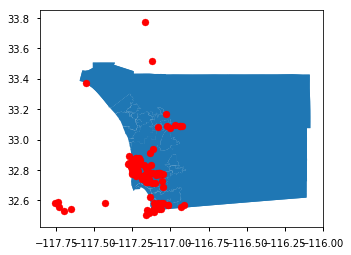

In [8]:
comm  = pkg.reference('communities').geoframe()
ax = comm.plot()
gdf.plot(ax=ax, color='red')

Not only are there only 106 valid points, but a lot of the points are in crazy places, outside of the city, outside of the county, and in the ocean. 

In [9]:
comm = pkg.reference('communities').geoframe()
comm.head()

,type,name,code,geometry
0,city,S.D. COUNTY,CN,POLYGON ((-117.0621375932527 33.10639472033611...
1,city,S.D. COUNTY,CN,POLYGON ((-117.0907852966509 33.10383120924283...
2,city,S.D. COUNTY,CN,"POLYGON ((-117.0990424203171 33.0964088949934,..."
3,city,S.D. COUNTY,CN,POLYGON ((-117.0849619730666 33.15525092251055...
4,city,S.D. COUNTY,CN,POLYGON ((-117.1017275485357 33.15262701224363...


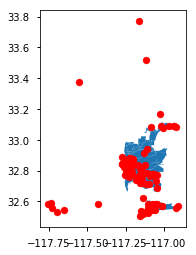

In [10]:
sd_comm = comm[ comm['type'] == 'sd_community']
ax = sd_comm.plot()
gdf.plot(ax=ax, color='red')

Spatially join the accident points with the communities. 

In [11]:
j = gpd.sjoin(gdf.dropna(subset=['geometry']), sd_comm)
sum(j.code.notnull())

84

Out of the small number with real points, only 84 of them link to a community in San Diego, we can get an answer, but it will not be a good one. 

In [12]:
j.groupby('name').count().case_id.sort_values(ascending=False)

name
LA JOLLA                               12
COLLEGE AREA                           10
UNIVERSITY                              7
PACIFIC BEACH                           6
MISSION VALLEY                          6
MISSION BAY PARK                        6
CLAIREMONT MESA                         5
SAN PASQUAL                             5
TIJUANA RIVER VALLEY                    4
OTAY MESA-NESTOR                        3
KEARNY MESA                             3
DOWNTOWN                                2
ENCANTO NEIGHBORHOODS,SOUTHEASTERN      2
MIRA MESA                               2
MISSION BEACH                           2
OTAY MESA                               2
BALBOA PARK                             2
LINDA VISTA                             1
MID-CITY:KENSINGTON-TALMADGE            1
MILITARY FACILITIES                     1
SKYLINE-PARADISE HILLS                  1
SOUTHEASTERN SAN DIEGO,SOUTHEASTERN     1
Name: case_id, dtype: int64